## **IMPORTING THE NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stat
from datetime import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings(action='ignore')

## **IMPORTING THE DATASET**

In [ ]:
df = pd.read_excel('airline.xlsx')

## **DATA EXPLORATION**

In [ ]:
df.head()

airline  overall               author   review_date  \
0               NaN      NaN                  NaN           NaN   
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2               NaN      NaN                  NaN           NaN   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
4               NaN      NaN                  NaN           NaN   

                                     customer_review aircraft  traveller_type  \
0                                                NaN      NaN             NaN   
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
2                                                NaN      NaN             NaN   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
4                                                NaN      NaN             NaN   

           cabin                         route           date_flown  \
0            NaN                           NaN                  NaN   
1  Economy Class  London to Izmir via Istanbul  2019-05-01 00:00:00   
2            NaN                           NaN                  NaN   
3  Economy Class         Istanbul to Bucharest  2019-05-01 00:00:00   
4            NaN                           NaN                  NaN   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           NaN            NaN       NaN            NaN             NaN   
1           4.0            5.0       4.0            4.0             2.0   
2           NaN            NaN       NaN            NaN             NaN   
3           4.0            1.0       1.0            1.0             1.0   
4           NaN            NaN       NaN            NaN             NaN   

   value_for_money recommended  
0              NaN         NaN  
1              4.0         yes  
2              NaN         NaN  
3              1.0          no  
4              NaN         NaN

In [ ]:
df.tail()

airline  overall             author         review_date  \
131890  Ukraine International      NaN   Andriy Yesypenko       19th May 2006   
131891                    NaN      NaN                NaN                 NaN   
131892  Ukraine International      NaN  Volodya Bilotkach     29th April 2006   
131893                    NaN      NaN                NaN                 NaN   
131894  Ukraine International      NaN    Kasper Hettinga  10th February 2006   

                                          customer_review aircraft  \
131890  Kiev - London (Gatwick) in business class (in ...      NaN   
131891                                                NaN      NaN   
131892  Several flights - KBP to AMS (3 times one way)...      NaN   
131893                                                NaN      NaN   
131894  KBP-AMS with UIA. Although it was a relatively...      NaN   

       traveller_type cabin route date_flown  seat_comfort  cabin_service  \
131890            NaN   NaN   NaN        NaN           NaN            NaN   
131891            NaN   NaN   NaN        NaN           NaN            NaN   
131892            NaN   NaN   NaN        NaN           NaN            NaN   
131893            NaN   NaN   NaN        NaN           NaN            NaN   
131894            NaN   NaN   NaN        NaN           NaN            NaN   

        food_bev  entertainment  ground_service  value_for_money recommended  
131890       NaN            NaN             NaN              NaN          no  
131891       NaN            NaN             NaN              NaN         NaN  
131892       NaN            NaN             NaN              NaN          no  
131893       NaN            NaN             NaN              NaN         NaN  
131894       NaN            NaN             NaN              NaN          no

In [ ]:
df.shape

(131895, 17)

In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
df.dtypes

airline             object
overall            float64
author              object
review_date         object
customer_review     object
aircraft            object
traveller_type      object
cabin               object
route               object
date_flown          object
seat_comfort       float64
cabin_service      float64
food_bev           float64
entertainment      float64
ground_service     float64
value_for_money    float64
recommended         object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
df.describe()

overall  seat_comfort  cabin_service      food_bev  entertainment  \
count  64017.000000  60681.000000   60715.000000  52608.000000   44193.000000   
mean       5.145430      2.952160       3.191814      2.908170       2.863372   
std        3.477532      1.441362       1.565789      1.481893       1.507262   
min        1.000000      1.000000       1.000000      1.000000       1.000000   
25%        1.000000      1.000000       2.000000      1.000000       1.000000   
50%        5.000000      3.000000       3.000000      3.000000       3.000000   
75%        9.000000      4.000000       5.000000      4.000000       4.000000   
max       10.000000      5.000000       5.000000      5.000000       5.000000   

       ground_service  value_for_money  
count    39358.000000     63975.000000  
mean         2.692820         2.943962  
std          1.612215         1.587370  
min          1.000000         1.000000  
25%          1.000000         1.000000  
50%          3.000000         3.000000  
75%          4.000000         4.000000  
max          5.000000         5.000000

In [ ]:
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [ ]:
# Making a copy of the dataset so as to keep the original data intact
df1 = df.copy()

# **DATA CLEANING**

**Dropping Unnecessary Columns**

In [ ]:
# Removing unnecessary columns.
airline_df = df1.drop(['author','aircraft','date_flown','route','review_date','customer_review'],axis = 1)


*   These columns does not have any significance in predictive analysis and also contains huge null values, so its been removed.





Checking Duplicated values

In [ ]:
#Counting no of duplicate values
airline_df.duplicated().sum()

85121

In [ ]:
#Removing the duplicates
airline_df.drop_duplicates(keep='first', inplace = True)



*   There were 85121 duplicated values. Removing the duplicated values and keeping only first values.




In [ ]:
#Counting no of duplicate values again
airline_df.duplicated().sum()

0

## Creating a Data Frame with all the Numerical Features

In [ ]:
numerical_df = airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [ ]:
# Filling null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df),columns = numerical_df.columns)

* For the numerical values we have used KNNImputer to impute data into null values.KNN is a very effective for data imputation.

In [ ]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46774 entries, 0 to 46773
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          46774 non-null  float64
 1   seat_comfort     46774 non-null  float64
 2   cabin_service    46774 non-null  float64
 3   food_bev         46774 non-null  float64
 4   entertainment    46774 non-null  float64
 5   ground_service   46774 non-null  float64
 6   value_for_money  46774 non-null  float64
dtypes: float64(7)
memory usage: 2.5 MB


* Let's merge again the numerical columns into our main dataframe after cleaning the data.

In [ ]:
airline_df = airline_df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [ ]:
airline_df = pd.concat([airline_df.reset_index(),numerical_df.reset_index()], axis =1)

In [ ]:
airline_df.isnull().sum()

index                  0
airline            65948
traveller_type     92140
cabin              68592
recommended        67455
index              85121
overall            85121
seat_comfort       85121
cabin_service      85121
food_bev           85121
entertainment      85121
ground_service     85121
value_for_money    85121
dtype: int64

In [ ]:
# droping the rows which have all values as NaN
airline_df.dropna(axis=0,how='any',inplace = True)

In [ ]:
airline_df = airline_df.dropna(subset=['recommended'])

In [ ]:
airline_df.isnull().sum()

index              0
airline            0
traveller_type     0
cabin              0
recommended        0
index              0
overall            0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
dtype: int64

* Voila Now we can say we don't have any null values in our dataset!!!  

In [ ]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 1 to 46773
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            15411 non-null  int64  
 1   airline          15411 non-null  object 
 2   traveller_type   15411 non-null  object 
 3   cabin            15411 non-null  object 
 4   recommended      15411 non-null  object 
 5   index            15411 non-null  float64
 6   overall          15411 non-null  float64
 7   seat_comfort     15411 non-null  float64
 8   cabin_service    15411 non-null  float64
 9   food_bev         15411 non-null  float64
 10  entertainment    15411 non-null  float64
 11  ground_service   15411 non-null  float64
 12  value_for_money  15411 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.6+ MB


* Now we have the shape of our dataset as 29731 rows and 11 columns

In [ ]:
numrical_feature = [feature for feature in numerical_df.columns]

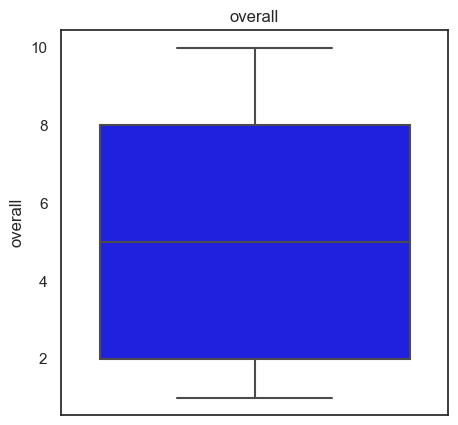

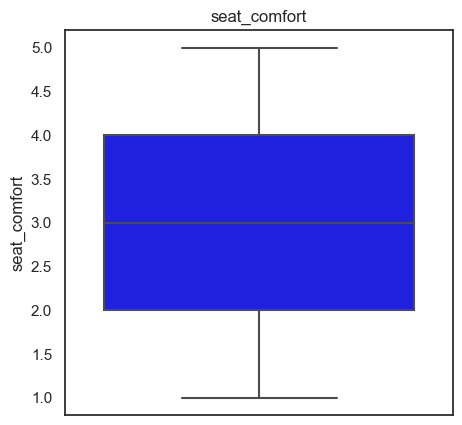

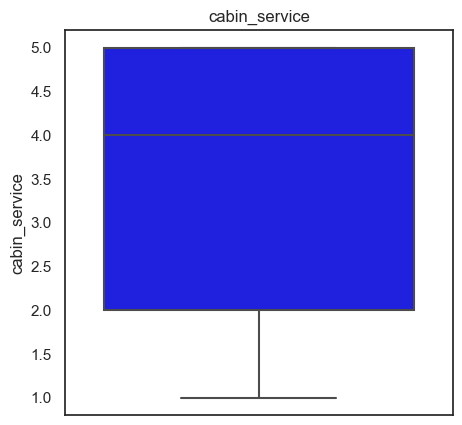

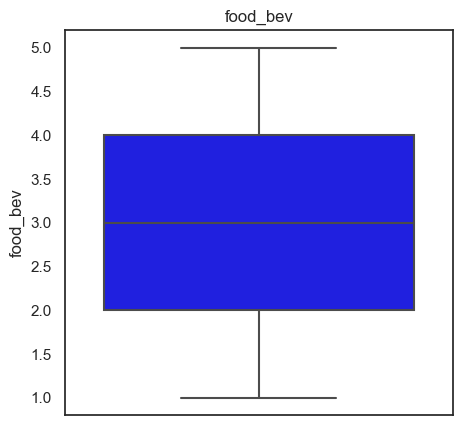

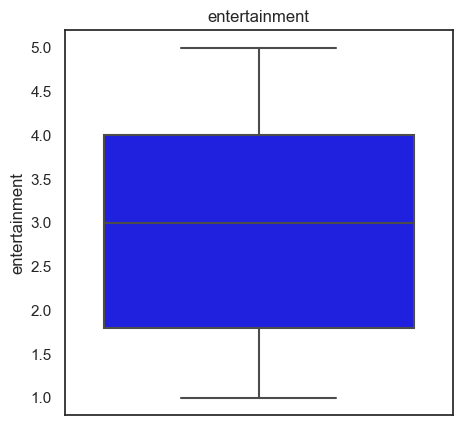

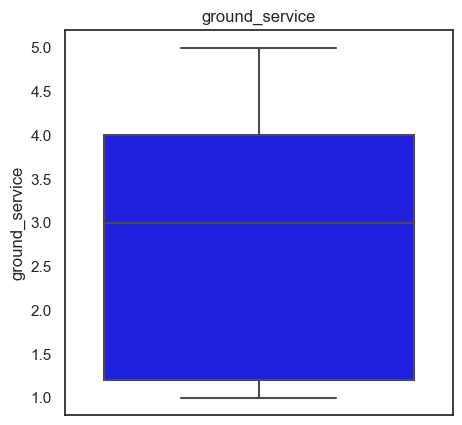

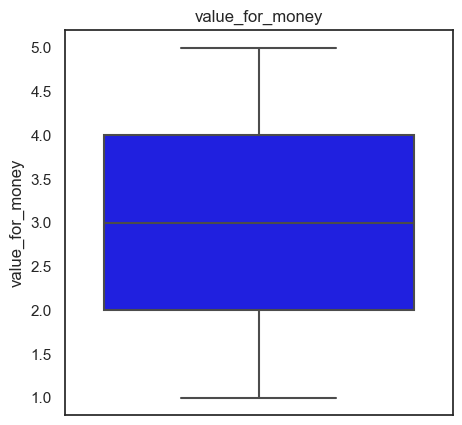

In [ ]:
for feature in numrical_feature:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=feature, data=airline_df, dodge=True, orient="h", palette=['blue'])
    plt.title(feature)
    plt.show()


* We can see that there are no outliers present in our data.

## Data Visualizations

In [ ]:
airline_df['cabin'].value_counts()

cabin
Economy Class      48558
Business Class     10326
Premium Economy     2799
First Class         1620
Name: count, dtype: int64

In [ ]:
airline_df['airline'].value_counts()

airline
British Airways            1809
American Airlines          1451
United Airlines            1380
Emirates                    993
China Southern Airlines     970
                           ... 
Thai Smile Airways           46
QantasLink                   34
Adria Airways                31
Germanwings                  28
Tunisair                     24
Name: count, Length: 81, dtype: int64

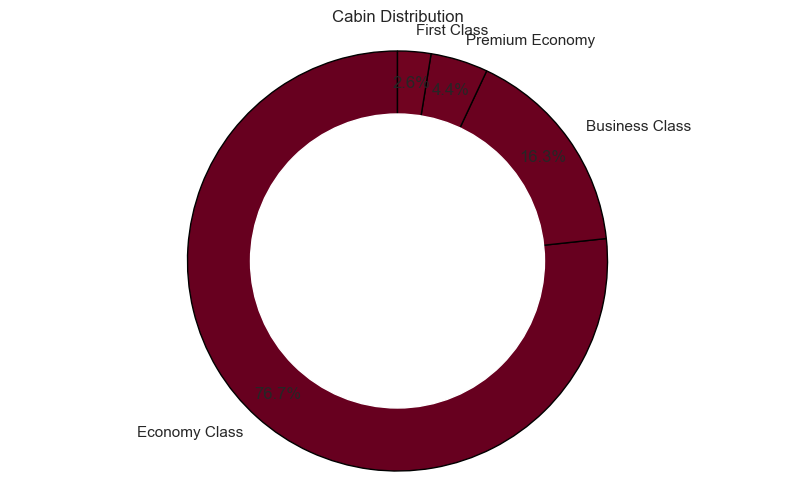

In [ ]:
seatcomfert = {
    'cabin': ['Economy Class', 'Business Class', 'Premium Economy', 'First Class'],
    'count': [48558, 10326, 2799, 1620]
}
seatcomfert_df= pd.DataFrame(seatcomfert)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(seatcomfert_df['count'], labels=seatcomfert_df['cabin'], autopct='%1.1f%%', startangle=90, colors=plt.cm.RdBu(range(len(seatcomfert_df))),
       wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

# Draw the center circle for the donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.title('Cabin Distribution')
plt.show()

* From above graph we can clearly see that nearly 76 % flyers are from Economy Class cabin followed by Businessclass that is 17 %

COUNTPLOT FOR CABIN WRT RECOMMENDED

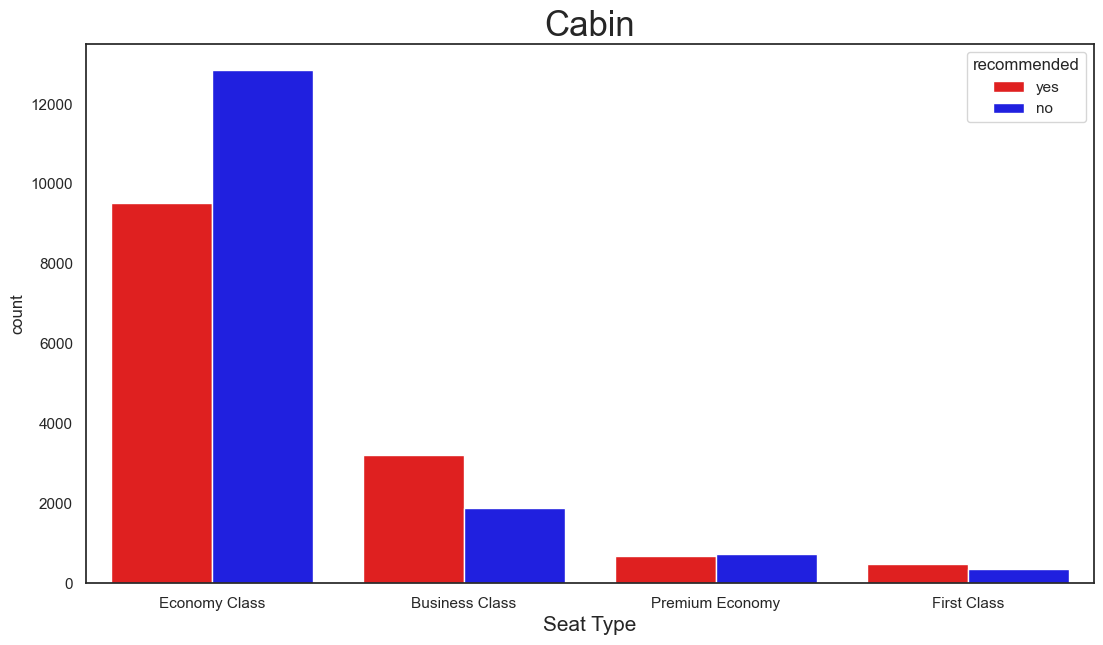

In [ ]:
plt.figure(figsize=(13,7))
sns.set_theme(style="white")


sns.countplot(x='cabin', hue='recommended', data=airline_df, palette=['red', 'blue'])

plt.title('Cabin', fontsize=25)
plt.xlabel('Seat Type', fontsize=15)
plt.show()

* So, economy class have more recomandation and first class have minimum.


**COUNTPLOT FOR TRAVELLER_TYPE WITH MOST RATINGS**



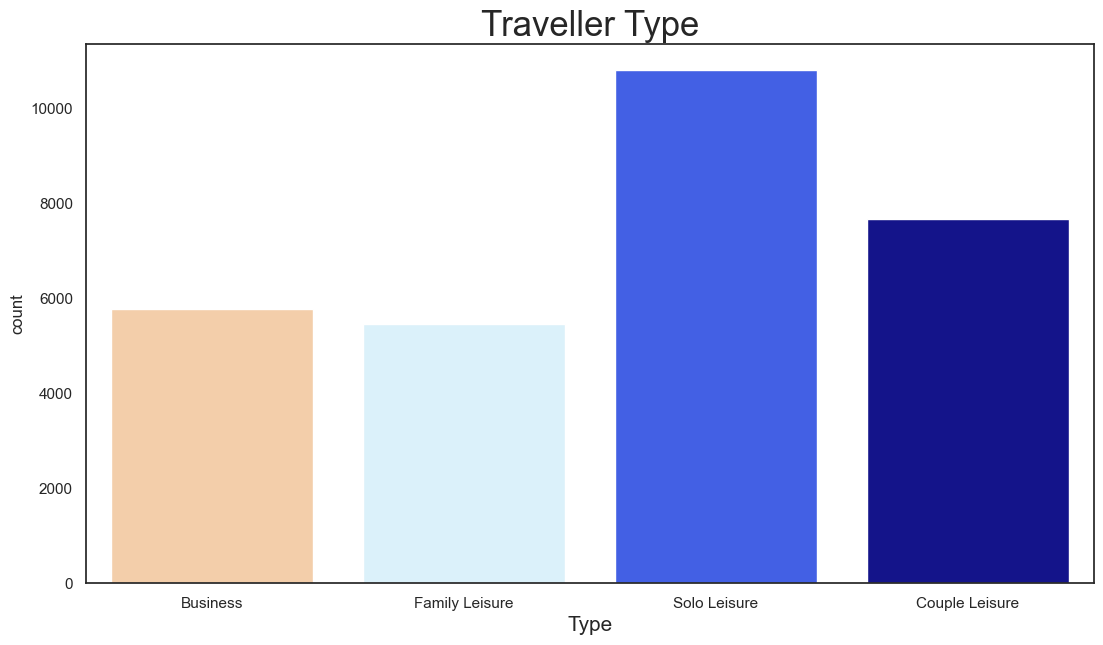

In [ ]:
# Traveller type with most ratings.
plt.figure(figsize=(13,7))
sns.set_theme(style="white")


sns.countplot(x='traveller_type', data=airline_df, palette="flag")

plt.title('Traveller Type', fontsize=25)
plt.xlabel('Type', fontsize=15)
plt.show()




The bar plot shows the count of reviews categorized by traveler type (Business, Family Leisure, Solo Leisure, Couple Leisure). Here's what the graph suggests:

1. **Solo Leisure**:
   - Highest number of reviews.
   - Indicates that solo travelers are the most frequent reviewers.

2. **Couple Leisure**:
   - Second highest number of reviews.
   - Indicates that couples traveling for leisure also frequently provide reviews.

3. **Business**:
   - Moderate number of reviews.
   - Suggests that business travelers are also actively reviewing but less so than solo and couple leisure travelers.

4. **Family Leisure**:
   - Fewest reviews.
   - Indicates that families traveling for leisure provide the least number of reviews among the categories.

**Insight**: Solo and couple leisure travelers are the most active in providing reviews, while family leisure travelers are the least active.

NOW LET'S SEE THE TOP 10 AIRLINES

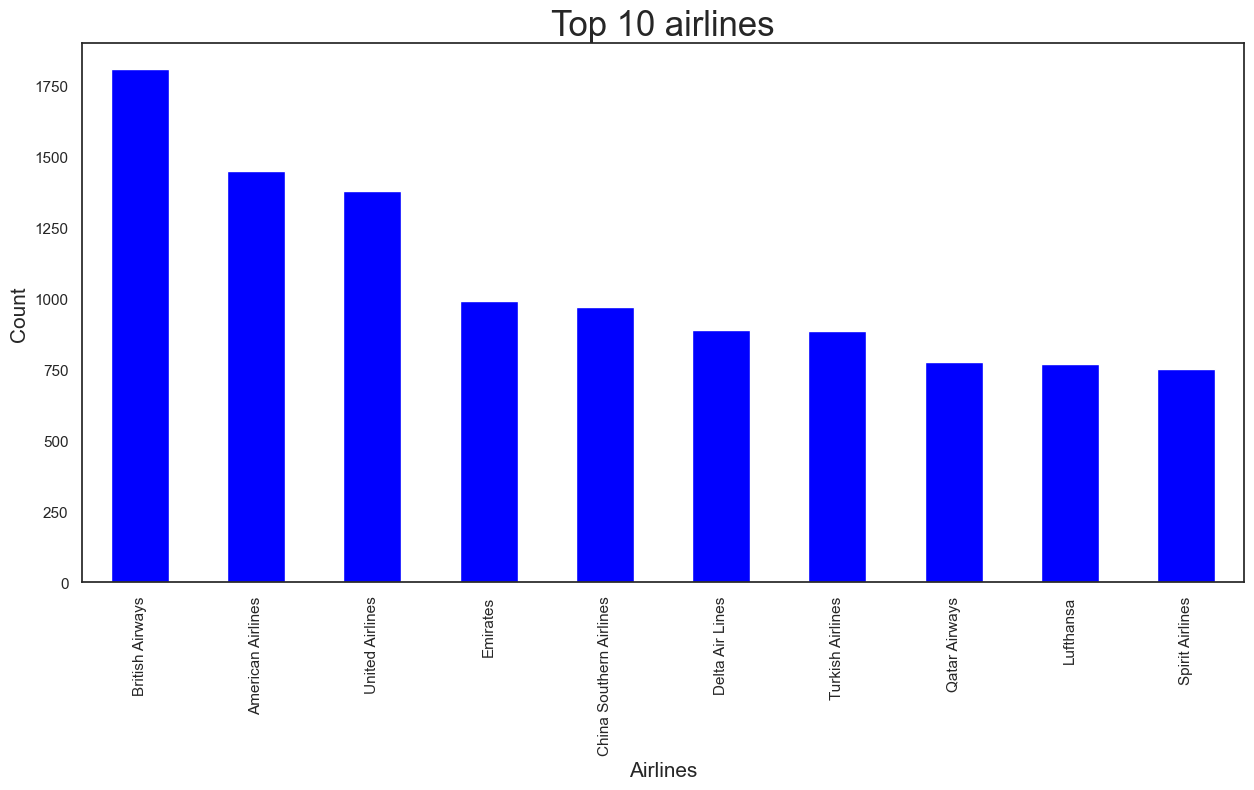

In [ ]:
# Visualisation of top 10 airlines in the dataset.

air=airline_df['airline'].value_counts()
sns.set_theme(style="white")
plt.figure(figsize=(15,7))
air[:10].plot(kind='bar',color ='#0000FF')
plt.title('Top 10 airlines',fontsize=25)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()



This graph shows maximum trips by planes . British airways has the most.

 **HISTOGRAM FOR RECOMMENDED**

In [ ]:
# Count of target variable (recommended)
airline_df['recommended'].value_counts()

#binary classification problem.

recommended
no     15817
yes    13914
Name: count, dtype: int64

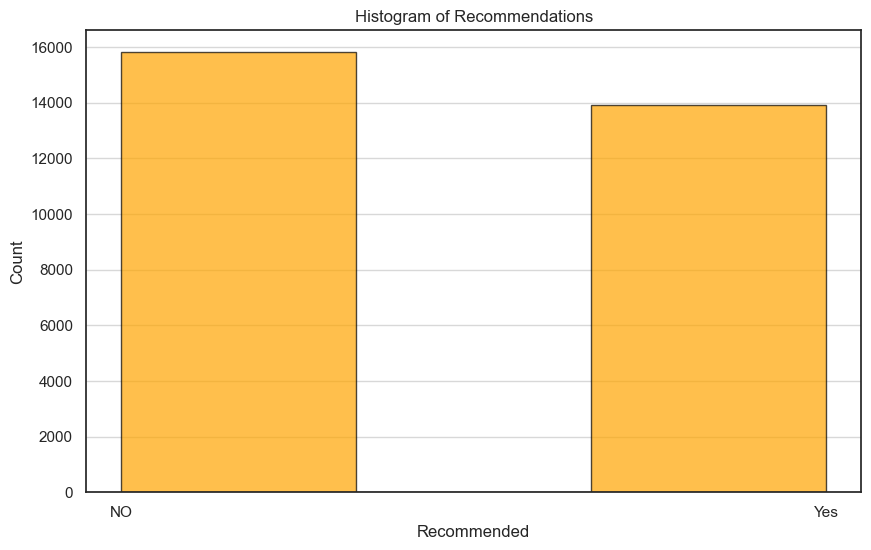

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(airline_df['recommended'], bins=3, color=['orange'], edgecolor='black', alpha=0.7)
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.title('Histogram of Recommendations')
plt.grid(axis='y', alpha=0.75)
plt.xticks([0, 1], ['NO', 'Yes'])
plt.show()

* 'No' responses are more as compared to 'Yes' responses
*  It seems nearly balanced target variable.

COUNTPLOT FOR AIRLINES

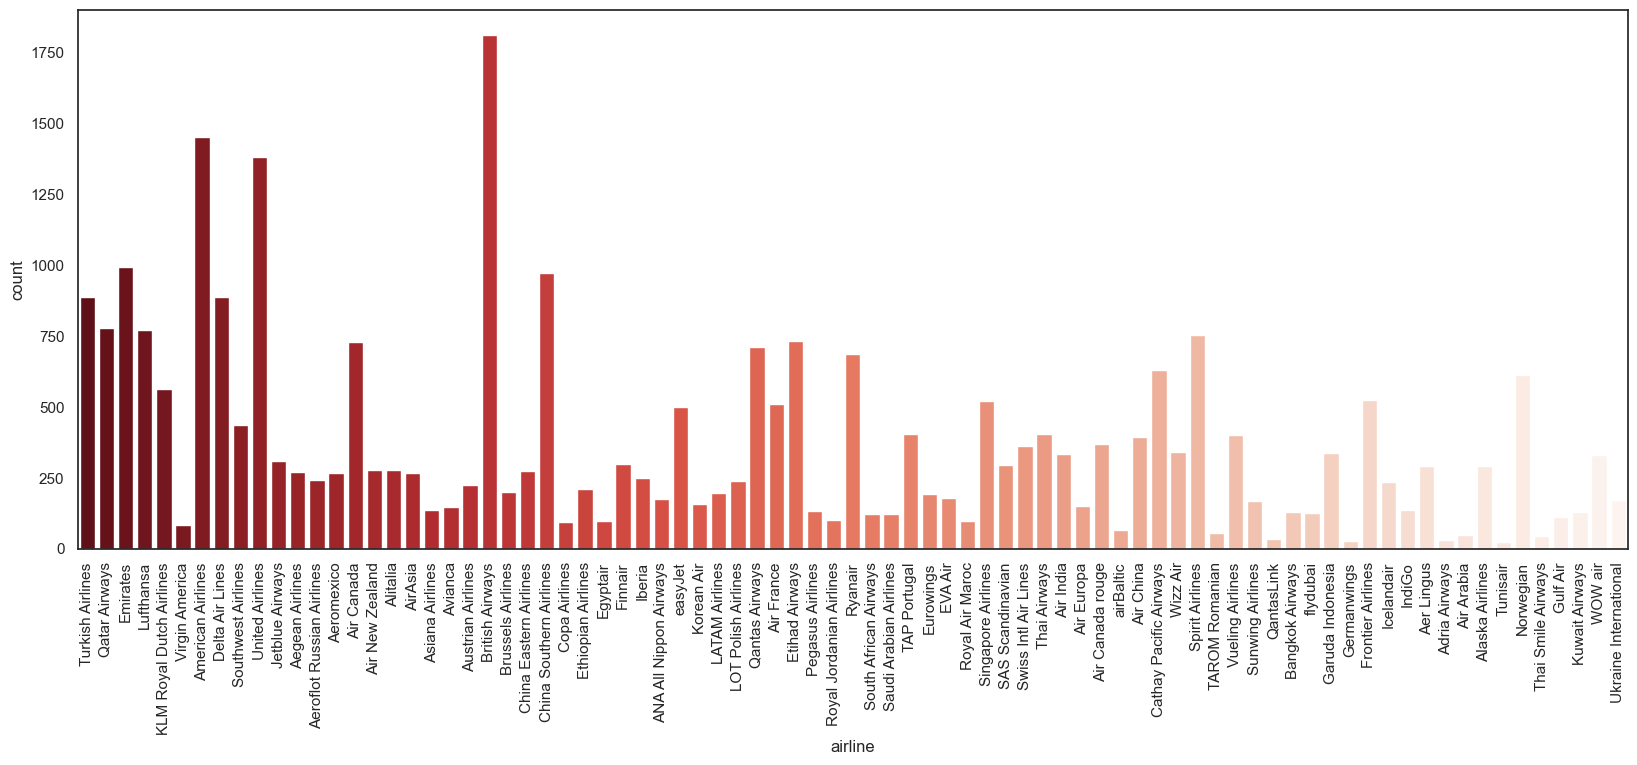

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})
sns.set_theme(style="white")
category_count=sns.countplot(x="airline",data=airline_df,palette="Reds_r")
category_count.set_xticklabels(category_count.get_xticklabels(), rotation=90)
sns.set_style("whitegrid")

* As we have seen earlier 'British Airways' is the topmost Airline.
* 'Tunisair','Germanwings' etc are the lowest number of trips.

In [ ]:
# Mapping the target feature with numerical data.
airline_df['recommended']=airline_df['recommended'].map({'yes':1,'no':0})


In [ ]:
airline_df.drop(columns='index',inplace=True)

## HEATMAP

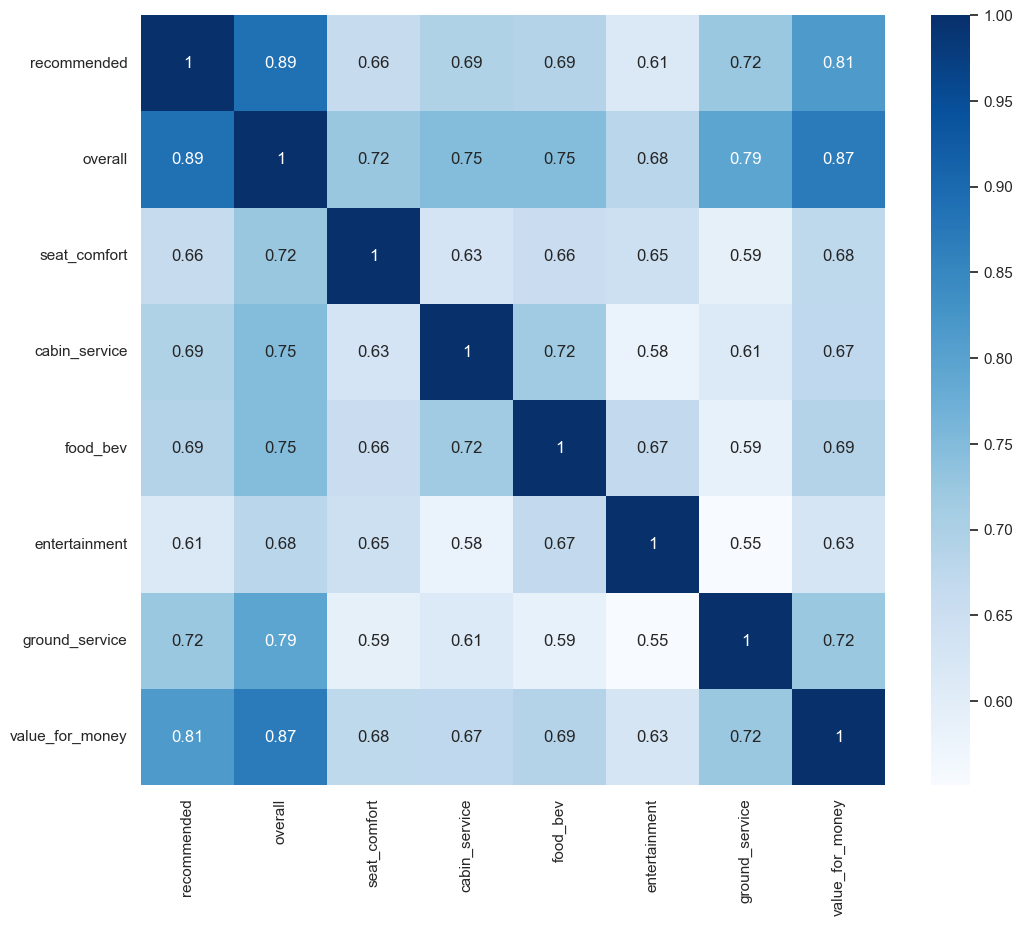

In [ ]:
numeric_cols = airline_df.select_dtypes(include=[np.number])

#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues')
plt.show()

Correlation matrix heatmap, which illustrates the relationships between different aspects of airline services, such as seat comfort, cabin service, food and beverages, entertainment, ground service, value for money, and how these factors correlate with overall customer satisfaction and recommendation rates.

Key observations:

    High Correlation with Recommendation: The factor "recommended" has strong correlations with "overall" satisfaction and "value for money", suggesting that these aspects are significant predictors of whether customers would recommend the airline.
    Variability in Service Aspects: Different service aspects have varying degrees of correlation with overall satisfaction. For instance, "seat comfort" and "cabin service" show notable correlations, indicating their importance in the overall passenger experience.
    Darker Shades Indicate Stronger Correlation: The darker the shade of blue, the stronger the correlation. This is visible in the strong relationship between overall satisfaction and whether passengers recommend the airline, as well as between the overall satisfaction and perceived value for money.

This heatmap is useful for identifying which factors are most influential in determining passenger satisfaction and the likelihood of recommending the airline, which can help in prioritizing areas for improvement.


* We can see there are some highly correlated values like value_for_money,overall etc

In [ ]:
features=airline_df.columns

In [ ]:
features

Index(['airline', 'traveller_type', 'cabin', 'recommended', 'overall',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [ ]:
features_1= features.drop(['airline','recommended'])

 **PLOT FOR THE FEATURES WRT TO RECOMMENDED**

traveller_type


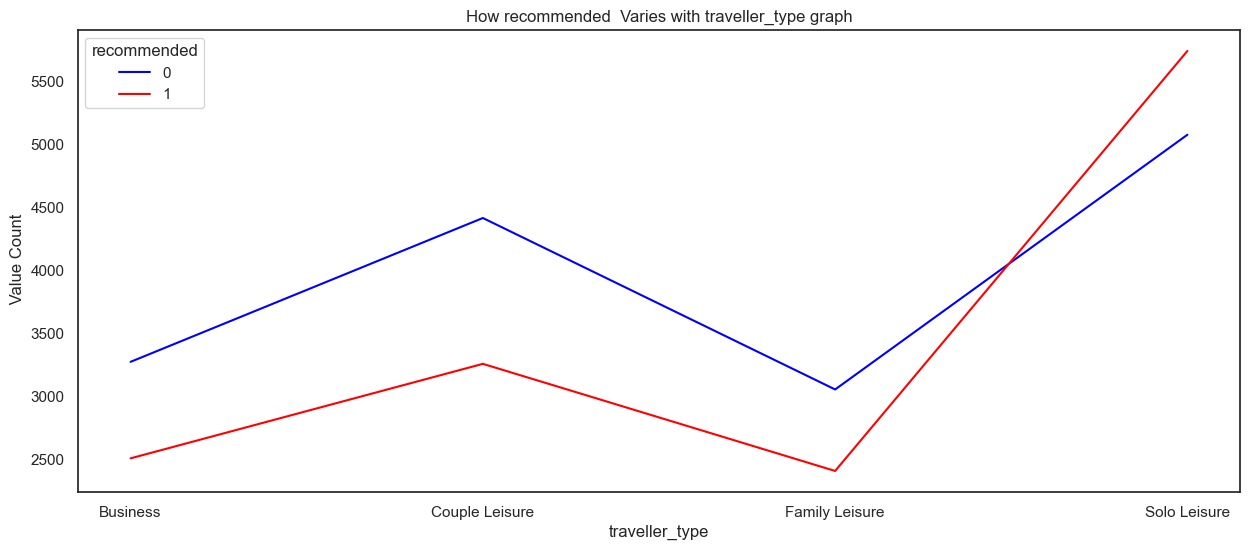

cabin


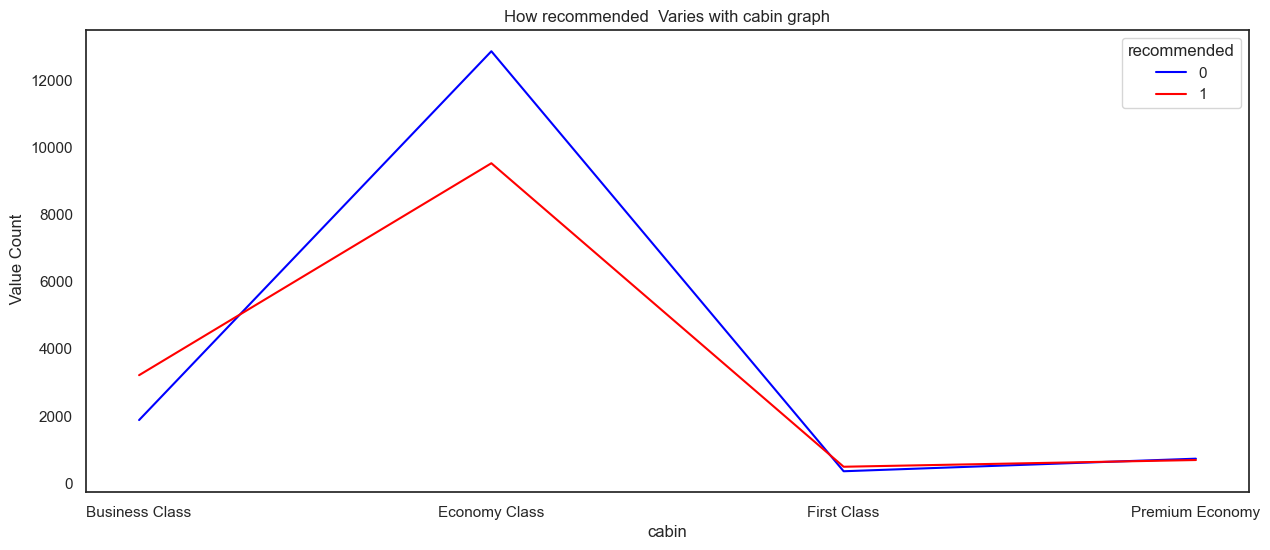

overall


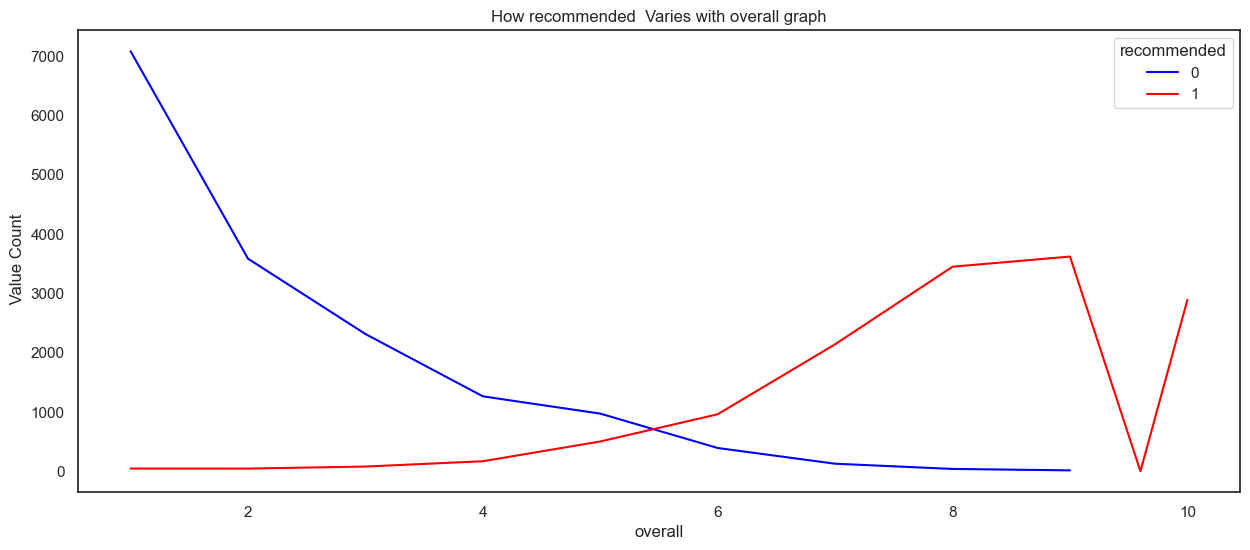

seat_comfort


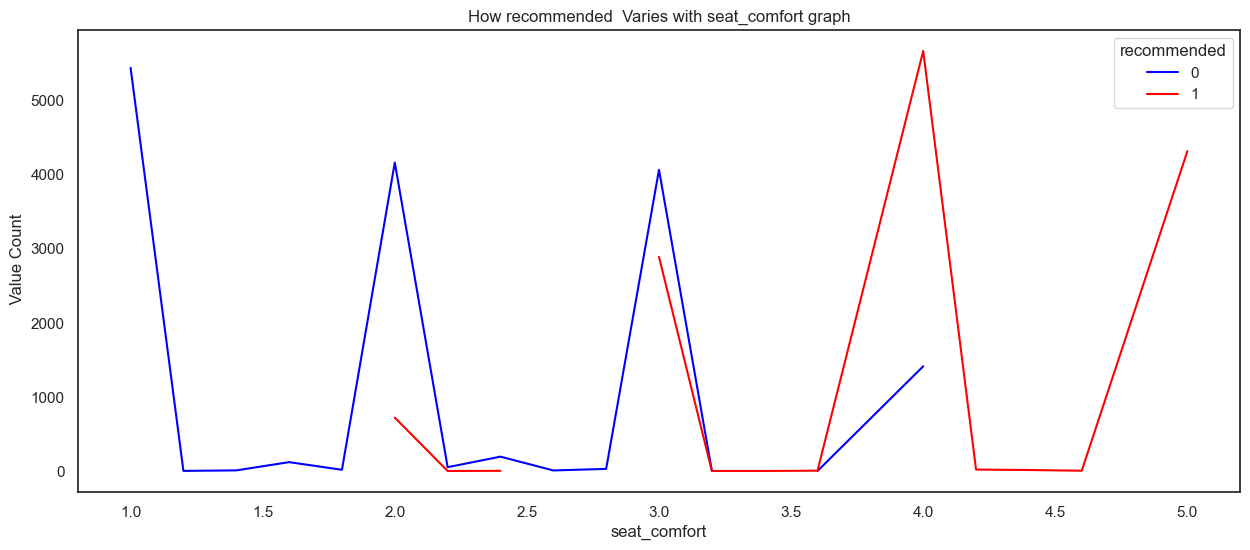

cabin_service


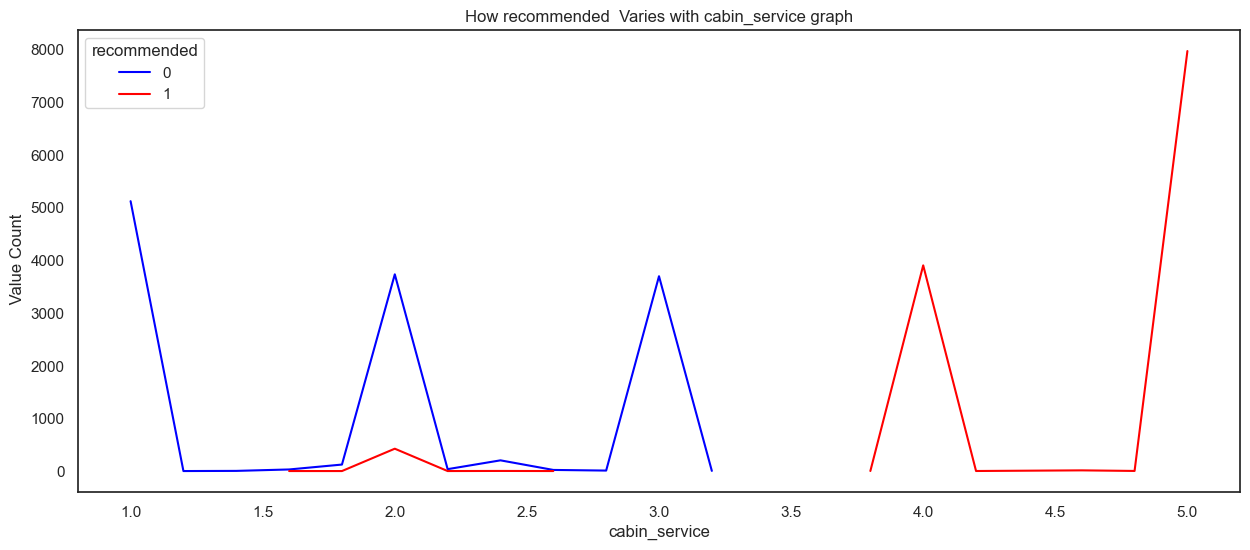

food_bev


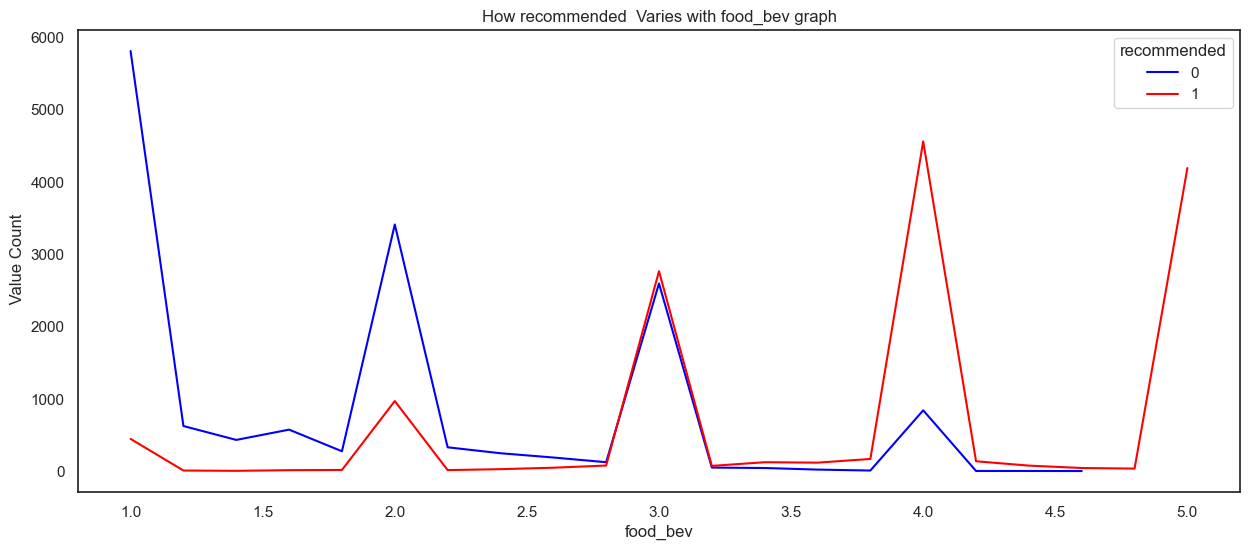

entertainment


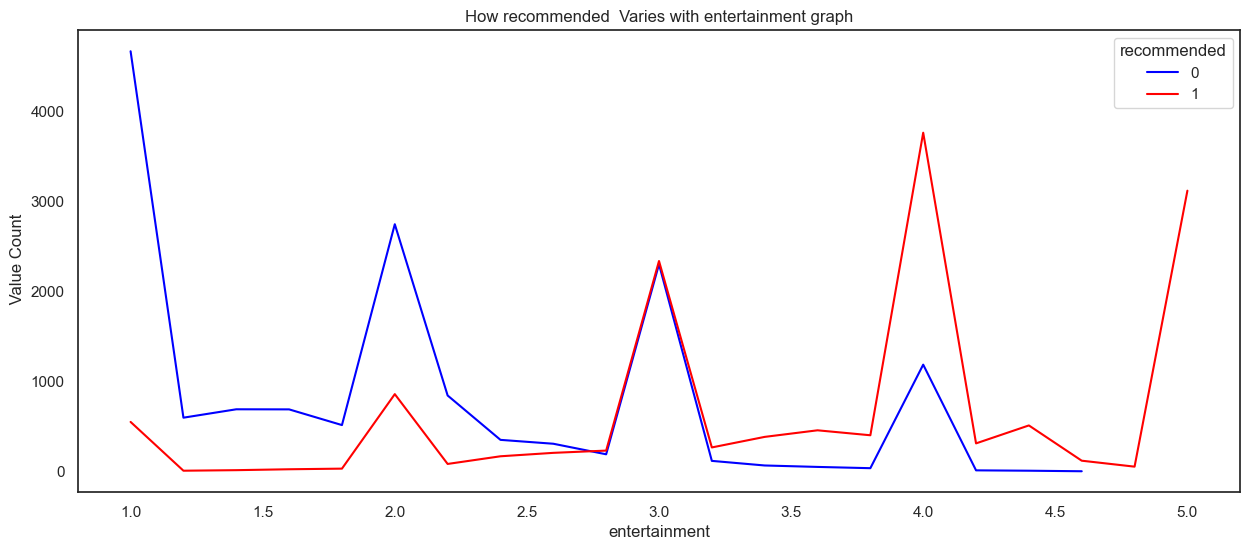

ground_service


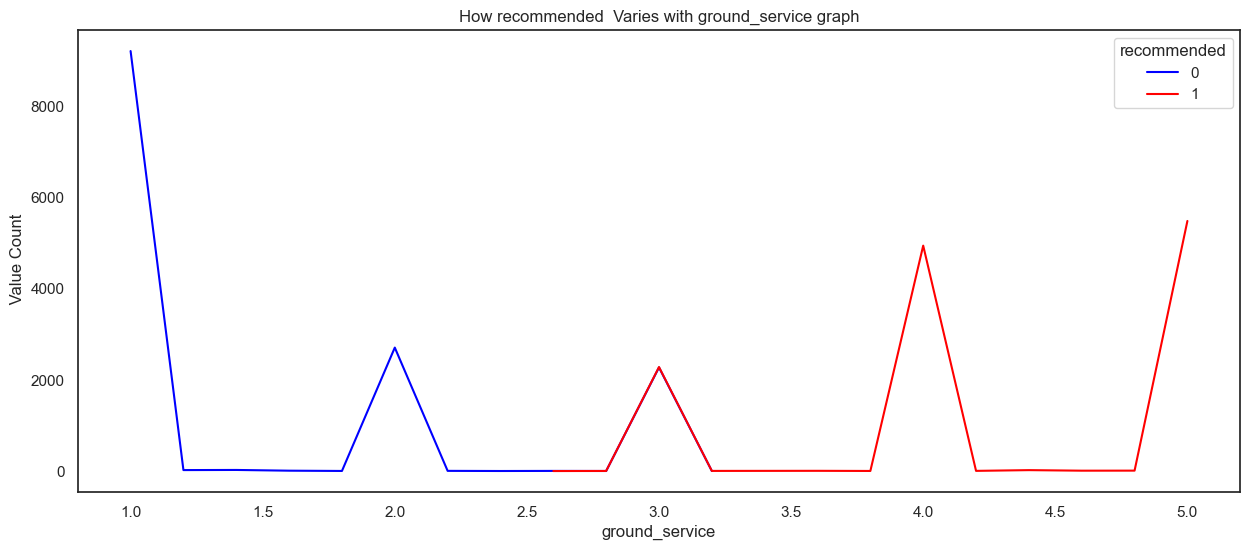

value_for_money


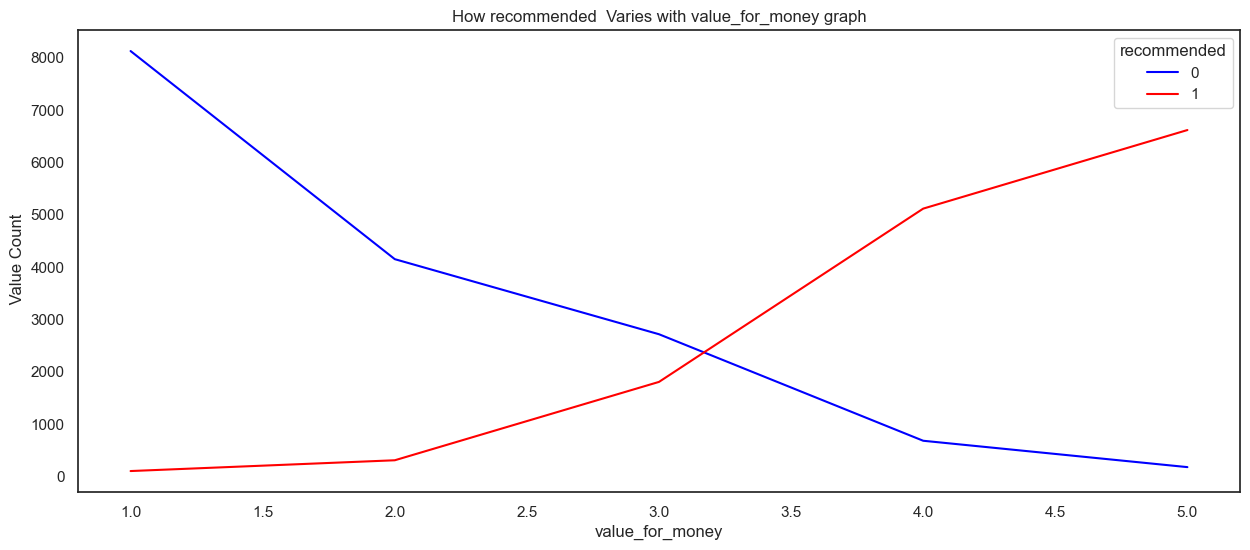

In [ ]:
for feature in features_1:
  print(feature)
  sns.set_theme(style="white")
  airline_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6),color=['blue','red'])
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

In [ ]:
airline_df.drop(["airline"], axis = 1, inplace = True)

# Dropping the 'airline' column as it is no more needed for further predictive analysis.

**ONE HOT ENCODING**

In [ ]:
traveller_type = pd.get_dummies(airline_df['traveller_type'],drop_first=True)
airline_df = pd.concat([airline_df,traveller_type],axis='columns')

cabin = pd.get_dummies(airline_df['cabin'],drop_first=True)
airline_df = pd.concat([airline_df,cabin],axis='columns')

airline_df.drop(['traveller_type','cabin'],axis=1,inplace=True)

## **Model Preparation**

In [ ]:
# Segregating dependent variable (target variable) and independent variables (input variable)
X = airline_df.drop(['recommended'], axis=1)
Y = airline_df['recommended']
print(Y.value_counts())

recommended
0    15817
1    13914
Name: count, dtype: int64


In [ ]:
Y.value_counts()[0]/len(Y)*100

53.200363257206284

In [ ]:
Y.value_counts()[1]/len(Y)*100

46.799636742793716

In [ ]:
# Splitting the data.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(23784, 13) (5947, 13)
(23784,) (5947,)


In [ ]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
recommended
0    12681
1    11103
Name: count, dtype: int64

 Distribution of classes of dependent variable in test :
recommended
0    3136
1    2811
Name: count, dtype: int64


**EVALUATION METRICS FOR CLASSIFICATION**

In [ ]:
# Evaluation metrics dataframe.
column_names = ["MODEL NAME", "ACCURACY", "RECALL", "PRECISION", "F1-SCORE", "ROC AUC SCORE"]
metrics_df = pd.DataFrame(columns=column_names)

In [ ]:
def add_metrics_details(model_name, Y_test, Y_pred, df):
    new_row = pd.DataFrame({
        'MODEL NAME': [model_name],
        'ACCURACY': [accuracy_score(Y_test, Y_pred)],
        'RECALL': [recall_score(Y_test, Y_pred)],
        'PRECISION': [precision_score(Y_test, Y_pred)],
        'F1-SCORE': [f1_score(Y_test, Y_pred)],
        'ROC AUC SCORE': [roc_auc_score(Y_test, Y_pred)]
    })
    return pd.concat([df, new_row], ignore_index=True)

## **MODEL IMPLEMENTATION**

In [ ]:
# 1. Decision Tree Model
tree_classify = DecisionTreeClassifier()
tree_classify.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy of Decision Tree Model:", tree_classify.score(X_train, Y_train))
print("Testing Accuracy of Decision Tree Model:", tree_classify.score(X_test, Y_test))

Training Accuracy of Decision Tree Model: 0.9953329969727548
Testing Accuracy of Decision Tree Model: 0.9250042038002354


In [ ]:
# Cross-validation for Decision Tree
cv_scores = cross_val_score(tree_classify, X, Y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy of Decision Tree Model: \n", cv_scores)
print("Mean Cross-validation Accuracy of Decision Tree Model: \n", cv_scores.mean())

Cross-validation Accuracy of Decision Tree Model: 
 [0.91306541 0.92213253 0.92768248 0.91523713 0.94635049]
Mean Cross-validation Accuracy of Decision Tree Model: 
 0.9248936069488352


In [ ]:
parameters = {"criterion": ["gini", "entropy"], "max_depth": [5, 7], "min_samples_split": [5, 7], "min_samples_leaf": [2, 3]}
scoring_ = ['f1', 'recall', 'precision', 'accuracy']

In [ ]:
#performing hyperparameter tuning using gridsearchcv
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5, refit='accuracy')
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [ ]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [ ]:
tree_cv.best_score_

0.9511436203174888

In [ ]:
#Fitting an best parameters to Decision tree Model
final_tree_after_hyper_param_tune = tree_cv.best_estimator_
final_tree_after_hyper_param_tune.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5)

In [ ]:
Y_pred_tree = tree_classify.predict(X_test)
Y_prob_tree = tree_classify.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation of the decision tree model
Y_pred = final_tree_after_hyper_param_tune.predict(X_test)
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947



Accuracy of the Model: 95.08996132503783%



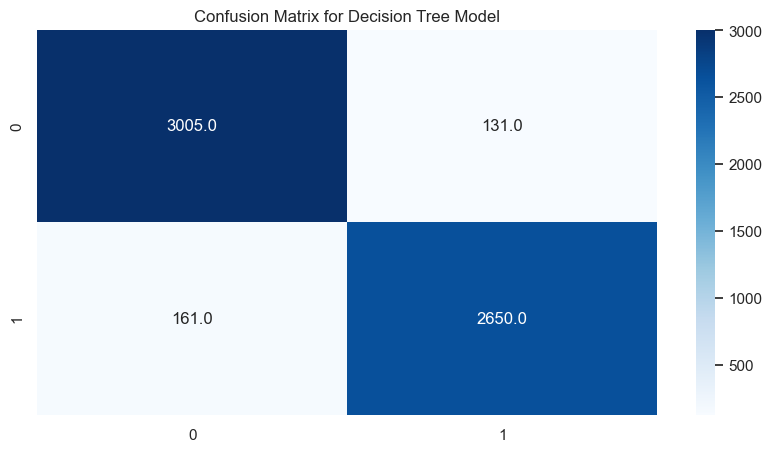

In [ ]:
print("Accuracy of the Model: {}%\n".format((accuracy_score(Y_test, Y_pred)) * 100))
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

In [ ]:
metrics_df = add_metrics_details("Decision Tree Model", Y_test, Y_pred, metrics_df)

**2. K-Nearest Neighbour Model**

In [ ]:
# KNN model implementation.
knn_classify = KNeighborsClassifier()
knn_classify.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
print("Training Accuracy of KNN Model:", knn_classify.score(X_train, Y_train))
print("Testing Accuracy of KNN Model:", knn_classify.score(X_test, Y_test))

Training Accuracy of KNN Model: 0.9598469559367642
Testing Accuracy of KNN Model: 0.9487136371279636


In [ ]:
# Cross-validation for KNN
cv_scores = cross_val_score(knn_classify, X, Y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy of KNN Model: \n", cv_scores)
print("Mean Cross-validation Accuracy of KNN Model: \n", cv_scores.mean())

Cross-validation Accuracy of KNN Model: 
 [0.93845636 0.94651867 0.94685503 0.94315506 0.96131853]
Mean Cross-validation Accuracy of KNN Model: 
 0.9472607313701799


In [ ]:
# Hyperparameter tuning.
parameters = {"n_neighbors": [5, 7, 9], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan", "minkowski"]}
scoring_ = ['f1', 'recall', 'precision', 'accuracy']

In [ ]:
knn_cv = GridSearchCV(estimator=knn_classify, param_grid=parameters, scoring=scoring_, cv=5, refit='accuracy')
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [ ]:
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [ ]:
knn_cv.best_score_

0.95118562826187

In [ ]:
final_knn_after_hyper_param_tune = knn_cv.best_estimator_
final_knn_after_hyper_param_tune.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
Y_pred = final_knn_after_hyper_param_tune.predict(X_test)
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.96      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947



In [ ]:
Y_pred_knn = knn_classify.predict(X_test)
Y_prob_knn = knn_classify.predict_proba(X_test)[:, 1]

Accuracy of the Model: 95.25811333445434%



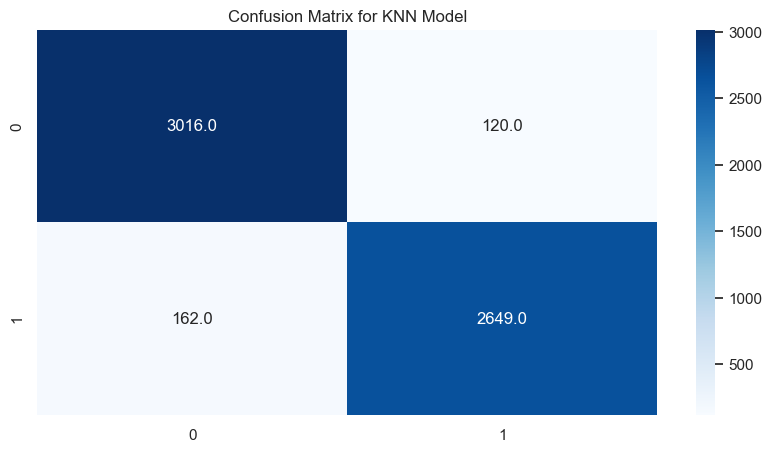

In [ ]:
print("Accuracy of the Model: {}%\n".format((accuracy_score(Y_test, Y_pred)) * 100))
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues")
plt.title("Confusion Matrix for KNN Model")
plt.show()

In [ ]:
metrics_df = add_metrics_details("KNN Model", Y_test, Y_pred, metrics_df)

**3. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
svm_model = SVC(probability=True, kernel='rbf', gamma=0.01, C=1)
svm_model.fit(X_train, Y_train)

SVC(C=1, gamma=0.01, probability=True)

In [ ]:

print("Training Accuracy of SVM Model:", svm_model.score(X_train, Y_train))
print("Testing Accuracy of SVM Model:", svm_model.score(X_test, Y_test))

Training Accuracy of SVM Model: 0.9536242852337706
Testing Accuracy of SVM Model: 0.9522448293257104


In [ ]:
# Cross-validation for SVM
cv_scores = cross_val_score(svm_model, X, Y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy of SVM Model: \n", cv_scores)
print("Mean Cross-validation Accuracy of SVM Model: \n", cv_scores.mean())


Cross-validation Accuracy of SVM Model: 
 [0.94081049 0.95072318 0.95324588 0.95173226 0.96451396]
Mean Cross-validation Accuracy of SVM Model: 
 0.9522051526911307


In [ ]:
# Hyperparameter tuning using GridSearchCV
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01], 'kernel': ['rbf', 'poly']}
svm_cv = RandomizedSearchCV(svm_model, svm_params, n_iter=5, cv=3, random_state=0, n_jobs=-1)
svm_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01],
                                        'kernel': ['rbf', 'poly']},
                   random_state=0)

In [ ]:
# Best parameters and best score after hyperparameter tuning.
print("Best Parameters: ", svm_cv.best_params_)
print("Best Score: ", svm_cv.best_score_)



Best Parameters:  {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
Best Score:  0.9529515640766902


In [ ]:
# Fitting the model with the best parameters.
final_svm_after_hyper_param_tune = svm_cv.best_estimator_
final_svm_after_hyper_param_tune.fit(X_train, Y_train)

SVC(C=1, gamma=0.01)

In [ ]:
Y_pred = final_svm_after_hyper_param_tune.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.96      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947



In [ ]:
Y_pred_svm = svm_model.predict(X_test)
Y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

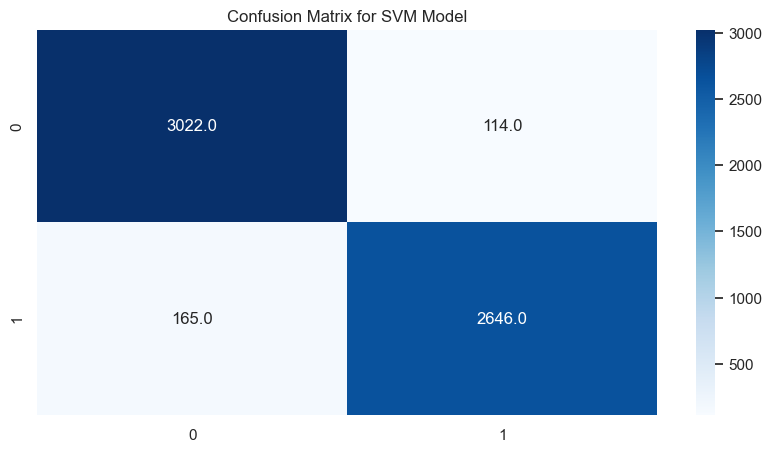

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues")
plt.title("Confusion Matrix for SVM Model")
plt.show()

In [ ]:
# Adding the evaluation metrics to the dataframe.
metrics_df = add_metrics_details("SVM Model", Y_test, Y_pred, metrics_df)
print(metrics_df)

            MODEL NAME  ACCURACY    RECALL  PRECISION  F1-SCORE  ROC AUC SCORE
0  Decision Tree Model  0.950900  0.942725   0.952895  0.947783       0.950476
1            KNN Model  0.952581  0.942369   0.956663  0.949462       0.952052
2            SVM Model  0.953086  0.941302   0.958696  0.949919       0.952475


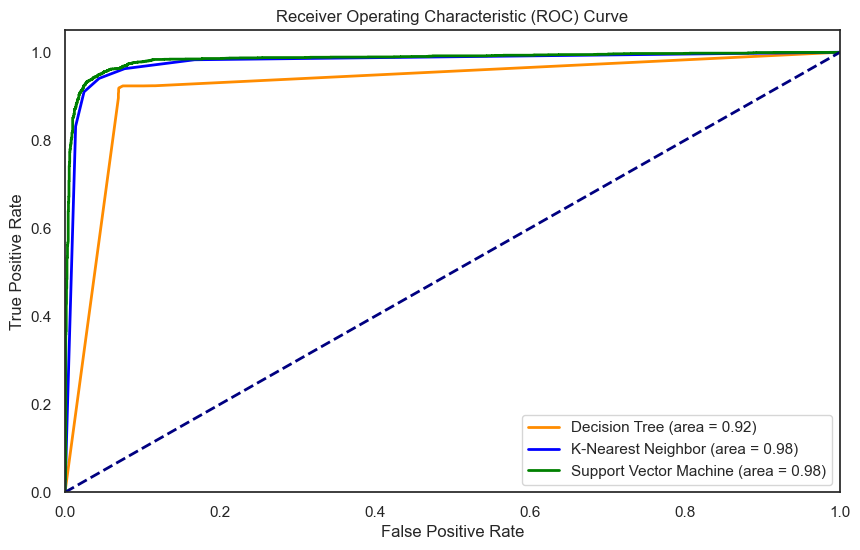

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_tree, tpr_tree, _ = roc_curve(Y_test, Y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='K-Nearest Neighbor (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='Support Vector Machine (area = %0.2f)' % roc_auc_svm)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install gymnasium[toy-text]

  Obtaining dependency information for gymnasium[toy-text] from https://files.pythonhosted.org/packages/a8/4d/3cbfd81ed84db450dbe73a89afcd8bc405273918415649ac6683356afe92/gymnasium-0.29.1-py3-none-any.whl.metadata
  Obtaining dependency information for farama-notifications>=0.0.1 from https://files.pythonhosted.org/packages/05/2c/ffc08c54c05cdce6fbed2aeebc46348dbe180c6d2c541c7af7ba0aa5f5f8/Farama_Notifications-0.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for pygame>=2.1.3 from https://files.pythonhosted.org/packages/82/61/93ae7afbd931a70510cfdf0a7bb0007540020b8d80bc1d8762ebdc46479b/pygame-2.5.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.8 MB 12.6 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/10.8 MB 15.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.8 MB 11.0 MB/s eta 0:00:01
   -------- -------------------------

In [ ]:
df2= pd.read_csv('cleanedairline_pred_data.csv')
df2.head()

recommended  overall  seat_comfort  cabin_service  food_bev  entertainment  \
0            1      7.0           4.0            5.0       4.0            4.0   
1            0      2.0           4.0            1.0       1.0            1.0   
2            0      3.0           1.0            4.0       1.0            3.0   
3            1     10.0           4.0            5.0       5.0            5.0   
4            0      1.0           1.0            1.0       1.0            1.0   

   ground_service  value_for_money  Couple Leisure  Family Leisure  \
0             2.0              4.0           False           False   
1             1.0              1.0           False            True   
2             1.0              2.0           False           False   
3             5.0              5.0           False           False   
4             1.0              1.0           False           False   

   Solo Leisure  Economy Class  First Class  Premium Economy  
0         False           True        False            False  
1         False           True        False            False  
2         False           True        False            False  
3          True           True        False            False  
4          True           True        False            False

In [ ]:
# Inspect the recommended column
print("Unique values in 'recommended' column:", df2['recommended'].unique())
print("Value counts of 'recommended' column:\n", df2['recommended'].value_counts())

Unique values in 'recommended' column: [1 0]
Value counts of 'recommended' column:
 recommended
0    15817
1    13914
Name: count, dtype: int64


# Q learning

In [ ]:
# Load the dataset
file_path = 'cleanedairline_pred_data.csv'
dataset = pd.read_csv(file_path)

# Preprocess the data
scaler = MinMaxScaler()
numerical_features = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


boolean_features = ['Couple Leisure', 'Family Leisure', 'Solo Leisure', 'Economy Class', 'First Class', 'Premium Economy']
dataset[boolean_features] = dataset[boolean_features].astype(int)

In [ ]:
# Define states and actions
states = dataset.drop(columns=['recommended']).values
actions = np.unique(dataset['recommended'].values)
num_states = len(states)
num_actions = len(actions)
# Initialize Q-table
q_table = np.zeros((len(states), len(actions)))

In [ ]:
# Hyperparameters
alpha = 0.1
gamma = 0.95
epsilon = 0.1
num_episodes = 10000 #i have incresed this after i got accuracy 51%


def choose_action(state_index):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)
    else:
        return np.argmax(q_table[state_index, :])

In [ ]:
# Training the agent
for episode in range(num_episodes):

    state_index = np.random.randint(0, len(states))
    done = False

    while not done:
        action = choose_action(state_index)

        next_state_index = (state_index + 1) % len(states)
        reward = dataset.iloc[next_state_index]['recommended']

        # Q-learning update
        q_table[state_index, action] = q_table[state_index, action] + alpha * (
            reward + gamma * np.max(q_table[next_state_index, :]) - q_table[state_index, action])

        state_index = next_state_index
        done = state_index == 0

print("Training completed")

Training completed


In [ ]:
def evaluate_policy(q_table, states, actions):
    correct_predictions = 0
    total_predictions = len(states)

    for state_index in range(total_predictions):
        action = np.argmax(q_table[state_index, :])
        correct_predictions += int(action == dataset.iloc[state_index]['recommended'])

    accuracy = correct_predictions / total_predictions
    return accuracy

accuracy = evaluate_policy(q_table, states, actions)
print(f"Policy accuracy: {accuracy:.2f}")

Policy accuracy: 0.51


# ILP For Airline Data

In [ ]:
#!pip install PyILP
#!pip install texttable

In [31]:
import numpy as np
import pandas as pd
# Load the clean airline dataset
cleaned_airline_data = pd.read_csv('cleanedairline_pred_data.csv')

facts = open("facts.pl",'w')
positives_file =  open("positives_file.pl",'w')
negatives_file =  open("negatives_file.pl",'w')
for i,data in cleaned_airline_data.iterrows():
  facts.write('ground_service('+str(i)+","+str(data["ground_service"])+").\n")
  facts.write('value_for_money('+str(i)+","+str(data["value_for_money"])+").\n")
  if data["recommended"]==0:
    negatives_file.write("recommended("+str(i)+").\n")
  else:
    positives_file.write("recommended("+str(i)+").\n")
  if i>200 :break
facts.close()
positives_file.close()
negatives_file.close()

In [33]:

from  PyILP.PyILP import *
model_2=aleph_learn(file="facts.pl", positive_example="positives_file.pl", negative_example="negatives_file.pl", test_size=0.3)

['recommended(0).recommended(A) :-   value_for_money(A,5.0).recommended(8).recommended(15).recommended(16).recommended(17).recommended(18).recommended(32).recommended(A) :-   ground_service(A,5.0), value_for_money(A,4.0).recommended(36).recommended(53).recommended(77).recommended(80).recommended(82).recommended(83).recommended(84).recommended(91).recommended(94).recommended(95).recommended(117).recommended(121).recommended(138).recommended(141).']
+----------+ Testing +----------+
+---------------------+------------------+------------------+
|       n = 61        | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 21               | 1                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 0                | 39               |
+---------------------+------------------+------------------+
+-------------+-------+
|   Metric    |   #   |
+=============+=======+
| Accura